In [18]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline
from numpy import genfromtxt
import numpy as np
import statsmodels.formula.api as smf

In [19]:
data = pd.read_csv('ke2.csv')
my_data = genfromtxt('apple-all-products-quarterly-sales.csv', delimiter=',')

In [32]:
data = data[:30]

In [33]:
data

,isales,st,st2
0,0.270,0.270,0.072900
1,1.119,1.389,1.929321
2,2.315,3.704,13.719616
3,1.703,5.407,29.235649
4,0.717,6.124,37.503376
5,6.892,13.016,169.416256
6,4.363,17.379,302.029641
7,3.793,21.172,448.253584
8,5.208,26.380,695.904400
9,7.367,33.747,1138.860009


In [34]:
lm = smf.ols(formula='isales ~ st + st2', data=data).fit()
# print the coefficients
lm.params

Intercept    1.314886
st           0.170744
st2         -0.000183
dtype: float64

In [35]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 isales   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     138.9
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           6.14e-15
Time:                        19:08:39   Log-Likelihood:                -88.807
No. Observations:                  30   AIC:                             183.6
Df Residuals:                      27   BIC:                             187.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3149      1.509      0.871      0.391      -1.782       4.412
st             0.1707      0.018      9.751      0.000       0.135       0.207
st2           -0.0002   3.26e-05     -5.622      0.000      -0.000      -0.000
==============================================================================
Omnibus:                        3.255   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                1.930
Skew:                           0.572   Prob(JB):                        0.381
Kurtosis:                       3.486   Cond. No.                     2.01e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
b = lm.params
b_1 = b[0]
b_2 = b[1]
b_3 = b[2]

In [37]:
m1 = (-b[1]+(b[1]**2-4*b[0]*b[2])**0.5)/(2*b[2])
m2 = (-b[1]-(b[1]**2-4*b[0]*b[2])**0.5)/(2*b[2])

m1

In [38]:
print(m1)

-7.638295925984359


In [39]:
print(m2)

939.3633066124025


In [40]:
p = b_1/max(m1,m2)
q = -max(m1,m2)*b_3

In [41]:
p

0.0013997629946951812

In [42]:
q

0.17214389281482279

In [43]:
def bass(M,p,q,iterations,step):
    t_array = [0]
    n_array = [p*M]
    Big_n_array = [p*M]
    ad_array = [p*M]
    for i in range(1,round(iterations/step)):
        t_array.append(i)
        n_array.append((p+q*Big_n_array[-1]/M)*(M-Big_n_array[-1]))
        Big_n_array.append(Big_n_array[-1]+n_array[-1])
        ad_array.append(p*(M-Big_n_array[-1]))
    return t_array, n_array, ad_array, Big_n_array
M = max(m1,m2)
ex = bass(M,p,q,100,1)

In [44]:
def create_grafic_2_max(x_data,y_data):
    for x,y in zip(x_data,y_data):
        plt.plot(x,y)
        plt.xlabel('Продажи')
        plt.xlabel('Время')
        plt.title('Модель Басса для iphone') 
    plt.show() 

In [45]:
def create_grafic_2_max_one(x_data,y_data,data_real):
    plt.plot(x_data,y_data)
    plt.ylabel('Продажи в миллионах')
    plt.xlabel('Время по кварталам')
    plt.title('Модель Басса для iphone')
    plt.plot([i for i in range(len(data_real))],data_real)
    plt.show() 
    plt.savefig('iphone.png')

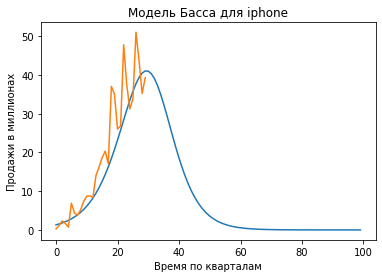

<Figure size 432x288 with 0 Axes>

In [46]:
data_real =data.to_numpy()[:,0]
create_grafic_2_max_one(ex[0],ex[1],data_real)

In [77]:
def create_grafic_2_max_log(x_data,y_data):
    plt.plot(x_data,y_data)
    plt.xlabel('Суммарные продажи')
    plt.xlabel('')
    plt.title('Суммарные продажи')
    plt.show() 

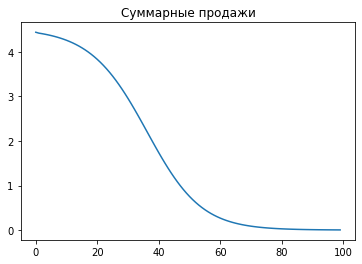

In [78]:
create_grafic_2_max_log(ex[0],ex[2])

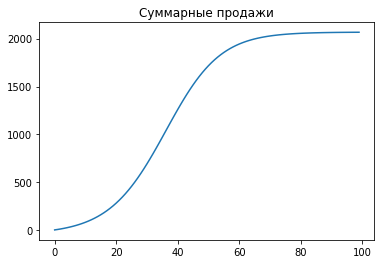

In [79]:
create_grafic_2_max_log(ex[0],ex[3])

In [80]:
def create_grafic_2_max_one(x_data,y_data,data_real):
    plt.plot(x_data,y_data)
    plt.ylabel('Продажи в миллионах')
    plt.xlabel('Время(квартал)')
    plt.title('Модель Басса для ipod')
    plt.plot([i for i in range(len(data_real))],data_real)
    plt.show() 

                            OLS Regression Results                            
Dep. Variable:             isales_pod   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     41.67
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           2.68e-11
Time:                        18:31:12   Log-Likelihood:                -141.59
No. Observations:                  52   AIC:                             289.2
Df Residuals:                      49   BIC:                             295.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6021      0.941      1.703      0.0

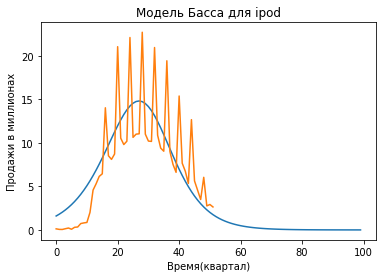

In [81]:
data = pd.read_csv('ipod_sales_with_cumsum_2_work.csv')
lm = smf.ols(formula='isales_pod ~ st + st2', data=data).fit()
# print the coefficients
print(lm.summary())
b = lm.params
b_1 = b[0]
b_2 = b[1]
b_3 = b[2]
m1 = (-b[1]+(b[1]**2-4*b[0]*b[2])**0.5)/(2*b[2])
m2 = (-b[1]-(b[1]**2-4*b[0]*b[2])**0.5)/(2*b[2])
print(m1)
print(m2)
p = b_1/max(m1,m2)
q = -max(m1,m2)*b_3
print(str(p)+" "+str(q))
M = max(m1,m2)
ex = bass(M,p,q,100,1)
data_real = [i*M/max(m1,m2) for i in data.to_numpy()[:,0]]
create_grafic_2_max_one(ex[0],ex[1],data_real)

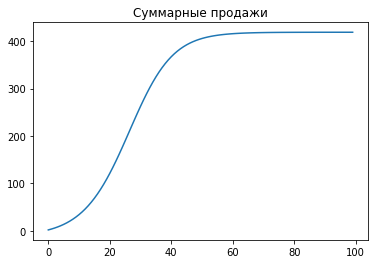

In [82]:
create_grafic_2_max_log(ex[0],ex[3])

In [83]:
p

0.0038229088446286325

In [206]:
q

0.16791616340993165

In [207]:
max(m1,m2)

348.4179909747803